## Imports & Load dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',None)

In [3]:
ipl_df = pd.read_csv('deliveries.csv')

In [4]:
ipl_df = ipl_df.rename(columns={'inning':'innings'})

In [107]:
ipl_df.tail(1)

,match_id,innings,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,runs_of_bat,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isOut
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,0


In [6]:
ipl_df.columns

Index(['match_id', 'innings', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'bowler', 'non_striker', 'runs_of_bat', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

## Additional Colums:

In [9]:
#ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [10]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [11]:
ipl_df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
ipl_df[ipl_df.batting_team == 'Punjab Kings'].total_runs.value_counts()

total_runs
1    2764
0    2388
4     795
6     436
2     420
5      15
3      11
7       4
Name: count, dtype: int64

In [13]:
ipl_df[ipl_df.batting_team == 'Delhi Capitals'].total_runs.value_counts()

total_runs
1    4611
0    3696
4    1365
2     658
6     545
3      34
5      17
7       5
Name: count, dtype: int64

## Choose Teams:

In [109]:
# t1 - bat first, t2 - bat second
# Ex: MI vs RCB, (match_id: 1254058) 

t1 = 'Mumbai Indians'
t2 = 'Punjab Kings'

## Choose a Match b/w these Teams:

In [112]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([1254074, 1426271], dtype=int64)

In [114]:
required_match_id = 1426271

In [116]:
ipl_df[ipl_df.match_id == required_match_id].head(6)

,match_id,innings,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,runs_of_bat,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isOut
251594,1426271,1,Mumbai Indians,Punjab Kings,0,1,Ishan Kishan,LS Livingstone,RG Sharma,0,0,0,NaN,0,NaN,NaN,NaN,0
251595,1426271,1,Mumbai Indians,Punjab Kings,0,2,Ishan Kishan,LS Livingstone,RG Sharma,1,0,1,NaN,0,NaN,NaN,NaN,0
251596,1426271,1,Mumbai Indians,Punjab Kings,0,3,RG Sharma,LS Livingstone,Ishan Kishan,1,0,1,NaN,0,NaN,NaN,NaN,0
251597,1426271,1,Mumbai Indians,Punjab Kings,0,4,Ishan Kishan,LS Livingstone,RG Sharma,0,0,0,NaN,0,NaN,NaN,NaN,0
251598,1426271,1,Mumbai Indians,Punjab Kings,0,5,Ishan Kishan,LS Livingstone,RG Sharma,1,0,1,NaN,0,NaN,NaN,NaN,0
251599,1426271,1,Mumbai Indians,Punjab Kings,0,6,RG Sharma,LS Livingstone,Ishan Kishan,4,0,4,NaN,0,NaN,NaN,NaN,0


In [118]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [120]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [122]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [124]:
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [126]:
t1_outcomes_count

[11171, 12756, 1939, 111, 3688, 1672, 1568]

In [128]:
t2_outcomes_count

[2388, 2764, 420, 11, 795, 436, 371]

In [130]:
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]

In [132]:
t1_pb, t2_pb

([0.33949247834675583,
  0.38766144962771615,
  0.058927214709010786,
  0.0033733475155751404,
  0.112080230967938,
  0.05081294636073545,
  0.04765233247226865],
 [0.3323590814196242,
  0.38469032707028533,
  0.05845511482254697,
  0.0015309672929714683,
  0.11064718162839249,
  0.060681976339596384,
  0.05163535142658316])

In [134]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [136]:
ipl_df.columns

Index(['match_id', 'innings', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'bowler', 'non_striker', 'runs_of_bat', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'isOut'],
      dtype='object')

In [138]:
import numpy as np
import pandas as pd

# Load IPL dataset (assuming ipl_df is already loaded as a DataFrame)
# Filter only first innings data
first_innings_df = ipl_df[ipl_df['innings'] == 1]

# Calculate probabilities of runs and wickets
run_counts = first_innings_df['runs_of_bat'].value_counts(normalize=True).sort_index()
wicket_prob = first_innings_df['isOut'].mean()

i1p_0 = run_counts.get(0, 0)
i1p_1 = i1p_0 + run_counts.get(1, 0)
i1p_2 = i1p_1 + run_counts.get(2, 0)
i1p_3 = i1p_2 + run_counts.get(3, 0)
i1p_4 = i1p_3 + run_counts.get(4, 0)
i1p_6 = i1p_4 + run_counts.get(6, 0)
i1p_w = wicket_prob

# Simulate an innings (120 balls)
pred_runs = 0
pred_wks = 0

for _ in range(120):
    r_value = np.random.random()
    
    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
        if pred_wks == 10:
            break

# Analysis
balls_faced = 120 if pred_wks < 10 else (pred_wks * 6)
runs_per_over = pred_runs / (balls_faced / 6)

print(f"Predicted Runs: {pred_runs}")
print(f"Predicted Wickets: {pred_wks}")
print(f"Run Rate: {runs_per_over:.2f}")


Predicted Runs: 168
Predicted Wickets: 0
Run Rate: 8.40


## Function: 1st Innings runs prediction 

In [141]:
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    # Extract overs and balls safely
    over_number, ball_number = extract_overs_balls(curr_overs)
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number * 6 + ball_number 
    leftover_balls = 120 - current_balls

    pred_runs = curr_score
    pred_wks = curr_wickets

    for _ in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs


In [143]:
import numpy as np
import pandas as pd

# Load IPL dataset (assuming ipl_df is already loaded as a DataFrame)
# Filter only first innings data
first_innings_df = ipl_df[ipl_df['innings'] == 1]

# Calculate probabilities of runs and wickets
run_counts = first_innings_df['runs_of_bat'].value_counts(normalize=True).sort_index()
wicket_prob = first_innings_df['isOut'].mean()

i1p_0 = run_counts.get(0, 0)
i1p_1 = i1p_0 + run_counts.get(1, 0)
i1p_2 = i1p_1 + run_counts.get(2, 0)
i1p_3 = i1p_2 + run_counts.get(3, 0)
i1p_4 = i1p_3 + run_counts.get(4, 0)
i1p_6 = i1p_4 + run_counts.get(6, 0)
i1p_w = wicket_prob

# Function to predict first innings runs
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_number = int(str(curr_overs).split('.')[0])
    ball_number = int(str(curr_overs).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number * 6 + ball_number 
    leftover_balls = 120 - current_balls

    for _ in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs


In [145]:
# innings_1_runs(curr_overs, curr_score, curr_wickets)
innings_1_runs(10.0, 75, 0)

144

## Function: 2nd Innings runs prediction 

In [148]:
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    # Extract overs and balls safely
    over_number, ball_number = extract_overs_balls(curr_overs)

    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number * 6 + ball_number 
    leftover_balls = 120 - current_balls

    pred_runs = curr_score
    pred_wks = curr_wickets

    for _ in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs


In [150]:
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    # Cumulative probabilities for second innings
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # Initialize predicted runs and wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # Convert overs to ball count
    over_number = int(str(curr_overs).split('.')[0])
    ball_number = int(str(curr_overs).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number * 6 + ball_number 
    leftover_balls = 120 - current_balls

    # Simulate remaining balls based on probability distribution
    for _ in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        # Stop simulation if target is reached
        if pred_runs > target:
            break

    return pred_runs


In [152]:
# innings_2_runs(curr_overs, curr_score, curr_wickets, target)
innings_2_runs(10.0, 100, 4, 167)

159

In [154]:
mdf = ipl_df[ipl_df.match_id == required_match_id]

In [156]:
mdf.reset_index(inplace = True, drop = True)

In [158]:
df_ing1 = mdf[mdf.innings == 1]
df_ing2 = mdf[mdf.innings == 2]

In [160]:
df_ing1 = df_ing1.sort_values(['over', 'ball'], ascending=[True, True], ignore_index=True)
df_ing2 = df_ing2.sort_values(['over', 'ball'], ascending=[True, True], ignore_index=True)


In [162]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

## Runs prediction: 1st Innings

In [165]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for _, row in df_ing1.iterrows():
    curr_score += row.total_runs
    curr_overs = row.over + (row.ball / 10)  # More accurate overs calculation
    curr_wickets += row.isOut

    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
#     print(f'Score: {curr_score}, Overs: {curr_overs}, Wickets: {curr_wickets}, Prediction: {prediction}')
    
    ing1_runs_pred.append(prediction)


In [167]:
ing1_actual_score = sum(df_ing1.total_runs)

## Runs prediction: 2nd Innings

In [170]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score  # First innings actual score

ing2_runs_pred = []

for _, row in df_ing2.iterrows():
    curr_score += row.total_runs
    curr_overs = row.over + (row.ball / 10)  # More accurate overs calculation
    curr_wickets += row.isOut

    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)
    
#     print(f'Target: {target}')
#     print(f'Score: {curr_score}, Overs: {curr_overs}, Wickets: {curr_wickets}, Prediction: {prediction}')
    
    ing2_runs_pred.append(prediction)


## Runs prediction chart: 1st Innings

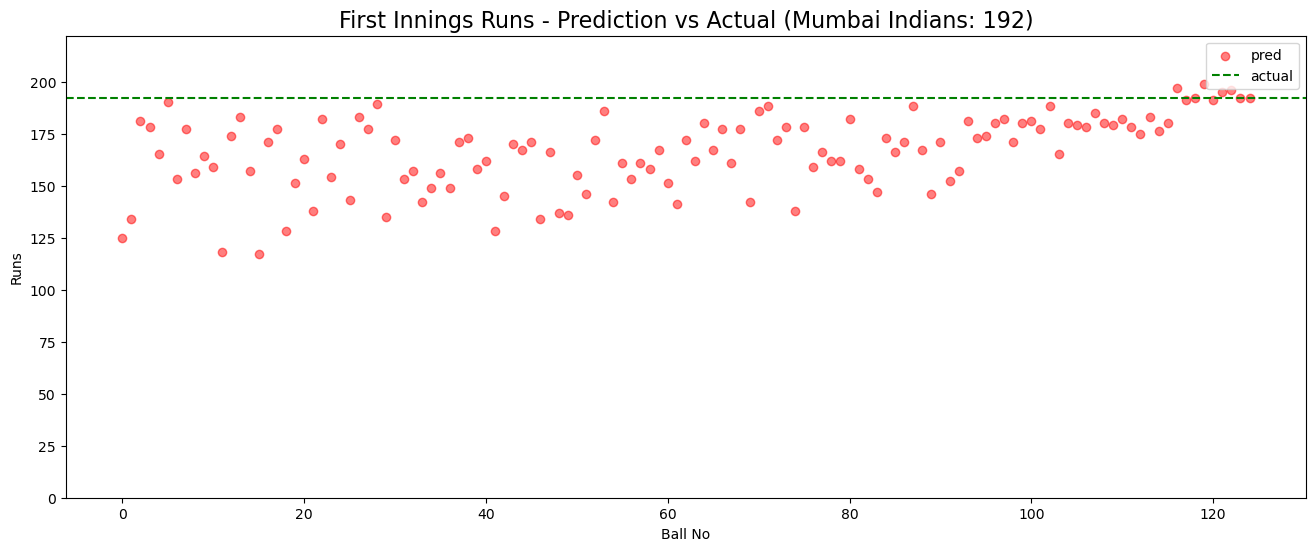

In [173]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

### Error in 1st Innings runs:

In [176]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

25.976

In [178]:
ing2_actual_score = sum(df_ing2.total_runs)

## Runs prediction chart: 2nd Innings

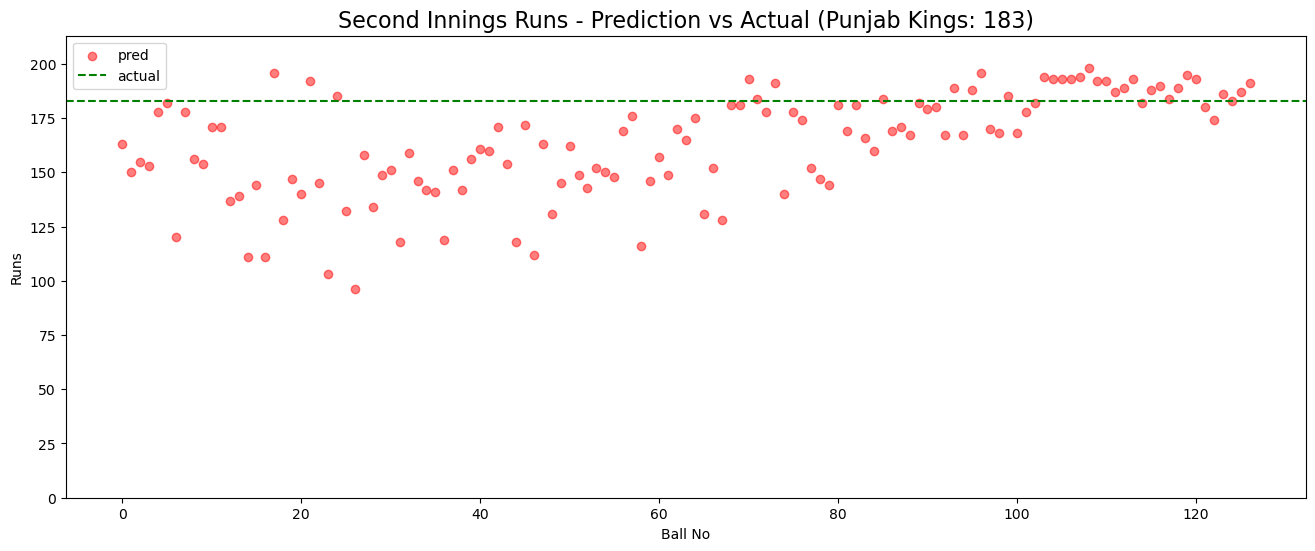

In [181]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'red')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'green')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

### Error in 2nd Innings runs:

In [184]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

23.188976377952756

## Win predictions: 1st Innings

## Win predictions: 2nd Innings

## Win Percentage Chart:

In [201]:
matches = pd.read_csv('matches.csv')

In [205]:
md = matches

In [207]:
md = md.rename(columns={'id':'match_id'})

In [209]:
comb=pd.merge(ipl_df,md,on = 'match_id',how ='left')


In [219]:
team_name = "Punjab Kings"  # Change this dynamically

# Filter matches where the selected team batted first
df_filtered = comb[
    (comb['innings'] == 1) &  
    (comb['batting_team'] == team_name) &  
    (~comb['winner'].isna())  # Ensure the match had a winner
]

# Display filtered data



In [227]:
df_filtered.tail()

,match_id,innings,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,runs_of_bat,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isOut,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
259748,1426307,1,Punjab Kings,Sunrisers Hyderabad,19,3,Shivam Singh,Nithish Kumar Reddy,JM Sharma,1,0,1,NaN,0,NaN,NaN,NaN,0,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyderabad",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
259749,1426307,1,Punjab Kings,Sunrisers Hyderabad,19,4,JM Sharma,Nithish Kumar Reddy,Shivam Singh,4,0,4,NaN,0,NaN,NaN,NaN,0,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyderabad",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
259750,1426307,1,Punjab Kings,Sunrisers Hyderabad,19,5,JM Sharma,Nithish Kumar Reddy,Shivam Singh,0,1,1,wides,0,NaN,NaN,NaN,0,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyderabad",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
259751,1426307,1,Punjab Kings,Sunrisers Hyderabad,19,6,JM Sharma,Nithish Kumar Reddy,Shivam Singh,6,0,6,NaN,0,NaN,NaN,NaN,0,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyderabad",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
259752,1426307,1,Punjab Kings,Sunrisers Hyderabad,19,7,JM Sharma,Nithish Kumar Reddy,Shivam Singh,6,0,6,NaN,0,NaN,NaN,NaN,0,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyderabad",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [231]:
# Group by match_id to get the final 1st innings score
df_1st_innings = df_filtered.groupby('match_id')['total_runs'].sum().reset_index()

# Merge with match results (winner)
match_results = comb[['match_id', 'winner', 'batting_team']].drop_duplicates()

# Merge 1st innings scores with results
df_1st_innings = df_1st_innings.merge(match_results, on='match_id', how='left')

# Mark if the batting team won
df_1st_innings['won'] = df_1st_innings['batting_team'] == df_1st_innings['winner']

# Group by score and calculate win % 
win_prob_df = df_1st_innings.groupby('total_runs')['won'].mean().reset_index()

# Rename columns
win_prob_df.columns = ['1st_innings_score', 'win_percentage']

# Display the first few rows
print(win_prob_df.tail())


    1st_innings_score  win_percentage
21                197             0.5
22                198             0.5
23                209             0.5
24                214             0.5
25                221             0.5


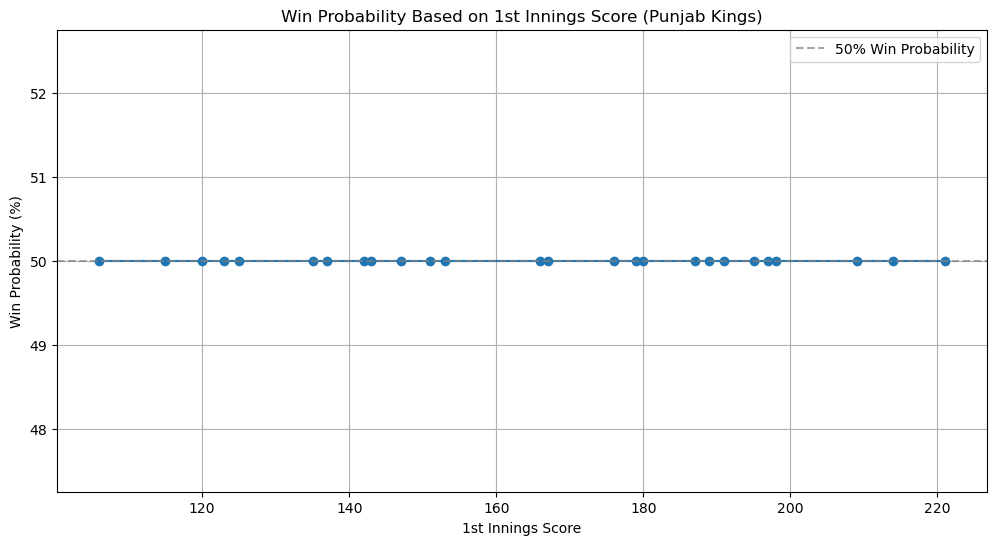

In [233]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(win_prob_df['1st_innings_score'], win_prob_df['win_percentage'] * 100, marker='o', linestyle='-')

plt.xlabel("1st Innings Score")
plt.ylabel("Win Probability (%)")
plt.title(f"Win Probability Based on 1st Innings Score ({team_name})")
plt.axhline(50, linestyle="--", color="grey", alpha=0.7, label="50% Win Probability")
plt.legend()
plt.grid(True)
plt.show()
